In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NLP_FIN/NLP_recomm/data.csv")
genre_data = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/data_by_genres.csv')
year_data = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/data_by_year.csv')

In [ ]:
data.drop_duplicates(inplace = True, subset = ['name'])

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = data.drop(labels=['year', 'acousticness', 'loudness'], axis = 1)

<Axes: >

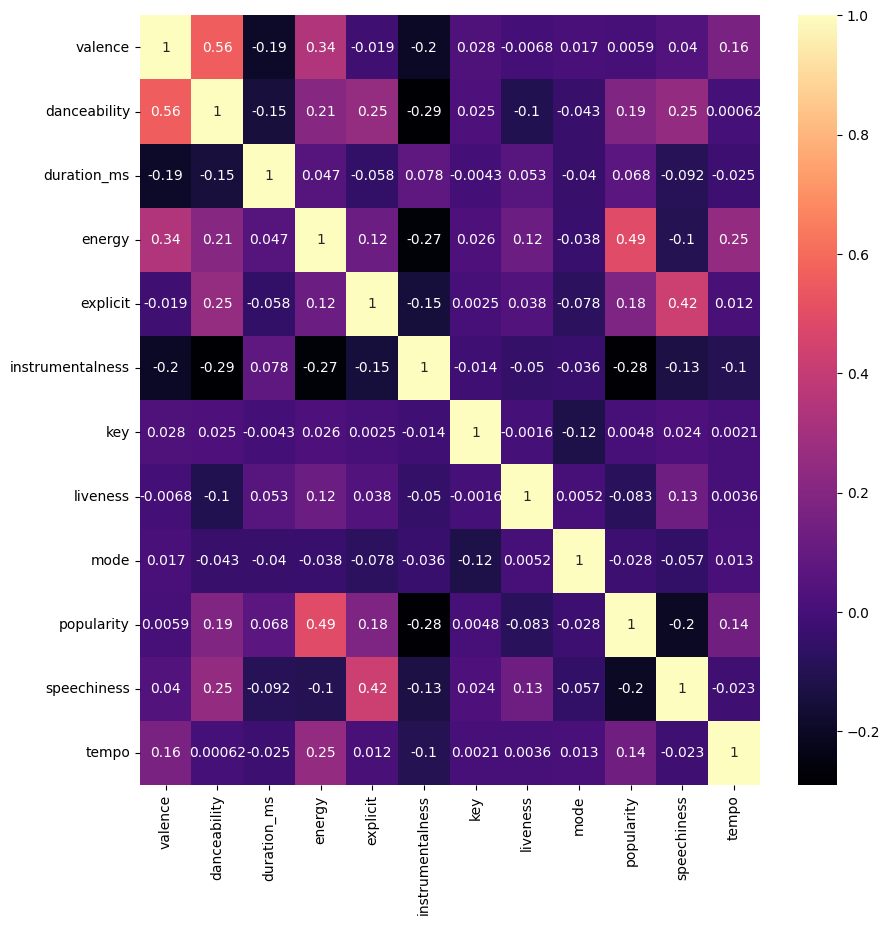

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='magma', annot=True)

In [ ]:
name = data['name']
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col = ['danceability', 'energy', 'valence']
X=MinMaxScaler().fit_transform(data[col])
kmeans = KMeans(init='k-means++', n_clusters = 10, random_state = 420).fit(X)

In [ ]:
data['kmeans'] = kmeans.labels_
data['song_name'] = name

In [ ]:
cluster = data.groupby(by=data['kmeans'])

In [ ]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [ ]:
model.score(x_test, y_test)

0.9860071834780006

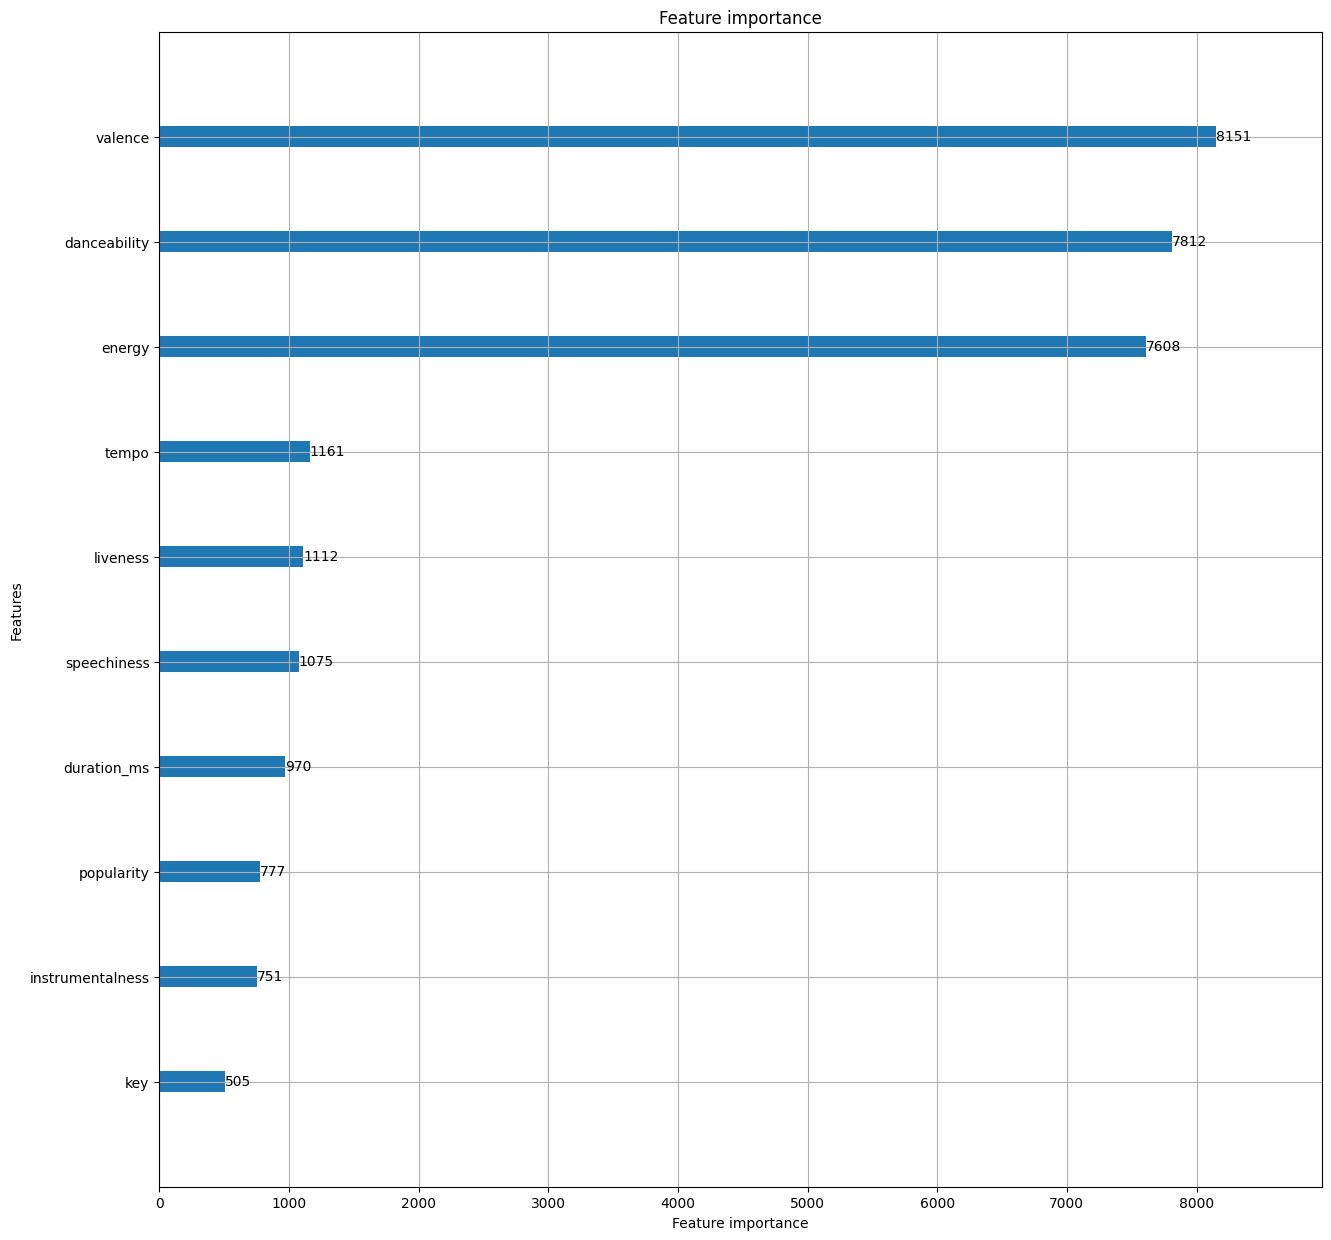

In [ ]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [ ]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2
                                                                      , verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.005s...
[t-SNE] Computed neighbors for 2973 samples in 0.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106270
[t-SNE] KL divergence after 1000 iterations: 1.395901
